<a href="https://colab.research.google.com/github/carlosvint/AprendizajeAutomaticoCienciaDatos2025/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

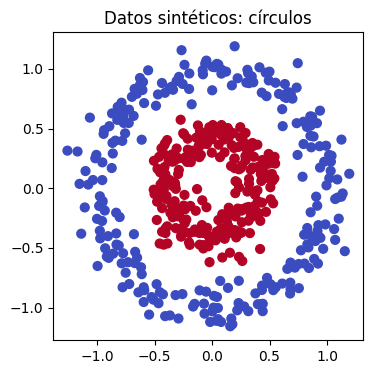

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Datos sintéticos tipo círculos
X, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=0)

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=40)
plt.title("Datos sintéticos: círculos")
plt.show()

In [34]:
#RelU(x) = max(x,0)
def relu(x):
  return np.maximum(0,x)

def softmax(z):
  z_shifted = z - np.max(z, axis =1, keepdims= True)
  exp = np.exp(z_shifted)
  return exp / np.sum(exp, axis=1, keepdims=True)

def one_hot(y, num_classes):
  y_oh = np.zeros((len(y), num_classes))
  y_oh[np.arange(len(y)), y] = 1
  return y_oh

def relu_prime(x):
    return (x > 0).astype(float)

In [7]:
Y_train = one_hot(y_train, 2)
Y_test = one_hot(y_test, 2)

In [22]:
## h = XW + b



In [ ]:
## formas de los diferentes inputs

Formas de los diferentes inputs:

*   X para nuestro ejemplo del circulo = (500, 2) 500 la cantidad de muestras, cada una tiene dos dimensiones// features
*   Texto = secuencia (1, 128) (batch_size, 128) // 1 cadena de texto de 128 caracteres. Embeddings (batch_size, sequence_length, numero_dimensiones)
*   Imagenes =  (batch_size, canales, H, W)
*   Sonido = (batch_size, canales, samples)







In [54]:
## Regresion: Output (batch_size, 1) ===> (1, 20.5)
## Clasificacion: Output (batch_size, 3) === (1, [0.02, 0.3, 0.68]) --> Negativo

In [ ]:
## Red neuronal que estamos haciendo
## Input: 2 features
## Hidden layer: 8 neuronas
## Output layer: 2 neuronas

In [49]:
np.random.seed(0)
W1 = np.random.randn(2,8) # 2 features x 8 numero de neuronas de la capa oculta
b1 = np.zeros((1, 8)) # 8 bias
W2 = np.random.randn(8,2) # 8 neuronas ocultas * 2 features de salida
b2 = np.zeros((1,2))

In [20]:
W1

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433]])

In [21]:
W2

array([[ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252]])

In [50]:
lr = 0.01
epochs = 1000

In [51]:
for epoch in range(epochs):
  # Forward Propagation
  z1 = X_train.dot(W1) + b1 #mx + b
  a1 = relu(z1) #generando una nolinealidad con la funcion relu
  z2 = a1.dot(W2) + b2

  probs = softmax(z2)
  # print(probs[50])

  # Loss
  loss = -np.mean(np.sum(Y_train * np.log(probs), axis=1))

  # Backprop
  dz2 = probs - Y_train
  dW2 = a1.T.dot(dz2) / len(X_train)
  db2 = np.mean(dz2, axis=0, keepdims=True)

  dz1 = dz2.dot(W2.T) * relu_prime(z1)
  dW1 = X_train.T.dot(dz1) / len(X_train)
  db1 = np.mean(dz1, axis=0, keepdims=True)

  # Actualizar parámetros
  W1 -= lr * dW1
  b1 -= lr * db1
  W2 -= lr * dW2
  b2 -= lr * db2

  if epoch % 20 == 0:
      print(f"Epoch {epoch}  Loss: {loss:.4f}")

Epoch 0  Loss: 1.1401
Epoch 20  Loss: 0.8592
Epoch 40  Loss: 0.6844
Epoch 60  Loss: 0.5932
Epoch 80  Loss: 0.5449
Epoch 100  Loss: 0.5195
Epoch 120  Loss: 0.5050
Epoch 140  Loss: 0.4950
Epoch 160  Loss: 0.4873
Epoch 180  Loss: 0.4806
Epoch 200  Loss: 0.4745
Epoch 220  Loss: 0.4687
Epoch 240  Loss: 0.4631
Epoch 260  Loss: 0.4578
Epoch 280  Loss: 0.4525
Epoch 300  Loss: 0.4472
Epoch 320  Loss: 0.4421
Epoch 340  Loss: 0.4371
Epoch 360  Loss: 0.4320
Epoch 380  Loss: 0.4270
Epoch 400  Loss: 0.4219
Epoch 420  Loss: 0.4168
Epoch 440  Loss: 0.4116
Epoch 460  Loss: 0.4064
Epoch 480  Loss: 0.4013
Epoch 500  Loss: 0.3962
Epoch 520  Loss: 0.3913
Epoch 540  Loss: 0.3864
Epoch 560  Loss: 0.3816
Epoch 580  Loss: 0.3768
Epoch 600  Loss: 0.3724
Epoch 620  Loss: 0.3680
Epoch 640  Loss: 0.3637
Epoch 660  Loss: 0.3596
Epoch 680  Loss: 0.3554
Epoch 700  Loss: 0.3514
Epoch 720  Loss: 0.3474
Epoch 740  Loss: 0.3434
Epoch 760  Loss: 0.3396
Epoch 780  Loss: 0.3357
Epoch 800  Loss: 0.3319
Epoch 820  Loss: 0.328

In [52]:
def predict(X):
    a1 = relu(X.dot(W1) + b1)
    out = softmax(a1.dot(W2) + b2)
    return np.argmax(out, axis=1)

In [53]:
y_pred = predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"Accuracy Test (NumPy MLP): {acc:.4f}")

Accuracy Test (NumPy MLP): 0.9267


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

In [27]:
#Definir la arquitectura del modelo

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(2,8),
        nn.ReLU(),
        nn.Linear(8,2)
    )
    self.init_weights()

  def init_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)

  def forward(self, x):
    return self.net(x)

In [28]:
model = MLP()

In [29]:
#Funcion de Perdida
criterion = nn.CrossEntropyLoss()

In [30]:
#Optimizador
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [31]:
for epoch in range(1000):
  optimizer.zero_grad() #Enceramos la memoria del optimizador
  outputs = model(X_train_t) # Hacemos el forward pass o forward propagation
  loss = criterion(outputs, y_train_t) #Calculamos la perdida
  loss.backward() #Backprop // Derivacion

  optimizer.step() #Ajustar los pesos

  if epoch % 20 == 0:
    print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.8191
Epoch 20 Loss: 0.6355
Epoch 40 Loss: 0.5656
Epoch 60 Loss: 0.4666
Epoch 80 Loss: 0.3594
Epoch 100 Loss: 0.2691
Epoch 120 Loss: 0.2002
Epoch 140 Loss: 0.1511
Epoch 160 Loss: 0.1179
Epoch 180 Loss: 0.0950
Epoch 200 Loss: 0.0783
Epoch 220 Loss: 0.0663
Epoch 240 Loss: 0.0569
Epoch 260 Loss: 0.0494
Epoch 280 Loss: 0.0430
Epoch 300 Loss: 0.0377
Epoch 320 Loss: 0.0333
Epoch 340 Loss: 0.0299
Epoch 360 Loss: 0.0267
Epoch 380 Loss: 0.0241
Epoch 400 Loss: 0.0219
Epoch 420 Loss: 0.0201
Epoch 440 Loss: 0.0185
Epoch 460 Loss: 0.0171
Epoch 480 Loss: 0.0158
Epoch 500 Loss: 0.0146
Epoch 520 Loss: 0.0136
Epoch 540 Loss: 0.0128
Epoch 560 Loss: 0.0120
Epoch 580 Loss: 0.0112
Epoch 600 Loss: 0.0105
Epoch 620 Loss: 0.0099
Epoch 640 Loss: 0.0094
Epoch 660 Loss: 0.0088
Epoch 680 Loss: 0.0084
Epoch 700 Loss: 0.0080
Epoch 720 Loss: 0.0076
Epoch 740 Loss: 0.0072
Epoch 760 Loss: 0.0069
Epoch 780 Loss: 0.0066
Epoch 800 Loss: 0.0063
Epoch 820 Loss: 0.0061
Epoch 840 Loss: 0.0058
Epoch 860 Loss: 0

In [32]:
with torch.no_grad():
  pred = torch.argmax(model(X_test_t), axis=1)
  acc = torch.mean((pred == y_test_t).float())

print(f"Accuracy Test (PyTorch MLP): {acc:.4f}")

Accuracy Test (PyTorch MLP): 1.0000


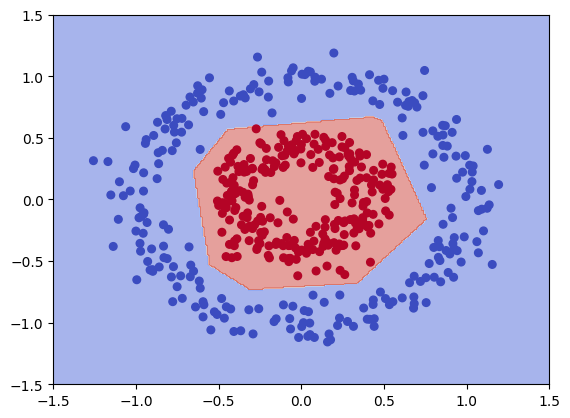

In [33]:
def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(
        np.linspace(-1.5, 1.5, 300),
        np.linspace(-1.5, 1.5, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_t = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        Z = torch.argmax(model(grid_t), axis=1).numpy()

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=30)
    plt.show()

plot_decision_boundary(model, X, y)


In [34]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [35]:
transform = transforms.ToTensor()


In [36]:
train = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test  = datasets.MNIST(root='data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.00MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.91MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]


In [37]:
train = DataLoader(train, batch_size=64, shuffle=True)
test = DataLoader(test, batch_size=64, shuffle=False)

In [43]:
for image, label in train:
  print(image.shape)
  break

torch.Size([64, 1, 28, 28])


Flatten(start_dim=[1, 28, 28], end_dim=-1)

In [61]:
class PrintLayer(nn.Module):
    def __init__(self, name=""):
        super().__init__()
        self.name = name

    def forward(self, x):
        print(f"{self.name} -> {tuple(x.shape)}")
        return x


In [62]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        PrintLayer("Input"),
        nn.Flatten(),
        PrintLayer("Flatten"),
        nn.Linear(in_features=28*28, out_features=256),
        PrintLayer("Linear1 → ReLU"),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=10),
        PrintLayer("Linear2 (output)")
    )

  def init_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)

  def forward(self, x):
    return self.net(x)

In [63]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

In [68]:
for images, labels in train:
  print(mlp(images[0]))
  print(labels[0])
  break

Input -> (1, 28, 28)
Flatten -> (1, 784)
Linear1 → ReLU -> (1, 256)
Linear2 (output) -> (1, 10)
tensor([[ 0.1065, -0.0472, -0.0134,  0.0196,  0.0089,  0.1187, -0.0874,  0.0388,
         -0.0862,  0.0574]], grad_fn=<AddmmBackward0>)
tensor(3)


In [52]:
for epoch in range(10): # Iteramos por el numero de epocas
  for images, labels in train: # Cargamos nuestra data con el dataloader
    optimizer.zero_grad()
    outputs = mlp(images) #Calcular el forward pass
    loss = criterion(outputs, labels) # Calculamos la perdida
    loss.backward() # Derivamos
    optimizer.step() # Ajustamos pesos

  if epoch % 1 == 0:
    print(f"Epoch {epoch} Loss: {loss.item():.4f}")



Epoch 0 Loss: 0.0308
Epoch 1 Loss: 0.0294
Epoch 2 Loss: 0.0066
Epoch 3 Loss: 0.0460
Epoch 4 Loss: 0.0110
Epoch 5 Loss: 0.0044
Epoch 6 Loss: 0.0018
Epoch 7 Loss: 0.0079
Epoch 8 Loss: 0.0110
Epoch 9 Loss: 0.0005


In [55]:
accuracy = []
with torch.no_grad():
  for image, label in test:
    acc = mlp(image).argmax(dim=1).eq(label).float().mean().item()
    accuracy.append(acc)

print(f"Accuracy: {np.mean(accuracy):.4f}")

Accuracy: 0.9798


In [57]:
len(accuracy)

157

CNN - Convolutional Neural Network

In [85]:
class BasicCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3)
    self.fc = nn.Linear(8*22*22, 10)

  def forward(self, x):
    # print(x.shape)
    x = self.conv(x)
    # print(x.shape)
    x = self.conv2(x)
    # print(x.shape)
    x = torch.relu(x)
    # print(x.shape)
    x = x.view(x.size(0), -1)
    # print(x.shape)
    return self.fc(x)

In [86]:
model = BasicCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [84]:
for images, labels in train:
  model(images)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64, 8, 24, 24])
torch.Size([64, 8, 22, 22])
torch.Size([64, 8, 22, 22])
torch.Size([64, 3872])


In [87]:
for epoch in range(5):
    for images, labels in train:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print("Loss:", loss.item())


Loss: 0.17657805979251862
Loss: 0.09922802448272705
Loss: 0.05967128649353981
Loss: 0.04769022762775421
Loss: 0.0186323169618845


In [ ]:
## El gato esta en la alfombra negra. Por ende no puede ser ese gato el que se perdio.

In [ ]:
## 1, 7
## 1, 36

Transformers Libreria y Huggingface

In [88]:
from transformers import AutoTokenizer, AutoModel

In [89]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [90]:
text = 'The cat is on the blue mat.'

In [91]:
inputs = tokenizer(text, return_tensors="pt")

In [92]:
inputs

{'input_ids': tensor([[  101,  1996,  4937,  2003,  2006,  1996,  2630, 13523,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [107]:
outputs = model(**inputs)

In [113]:
outputs.last_hidden_state.mean(dim=1).shape

torch.Size([1, 768])

In [98]:
from transformers import pipeline

In [99]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [102]:
classifier("Estoy feliz")

[{'label': 'POSITIVE', 'score': 0.9937552213668823}]

In [104]:
generator = pipeline("text-generation", model='gpt2')

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [106]:
generator("Hola, como estas", max_length=15, num_return_sequences=1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=15) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hola, como estas algo como el mundo.\n\nLol, no, I\'m sorry.\n\nThe last time I saw you, you were one of the first people to be kidnapped by your father. I\'d just seen him at a party, and he\'d told me about it.\n\nWell, I don\'t know if this was a dream or what, but I saw him.\n\nI was about thirty years old. I was just a kid, and I\'d been given a ticket to a club.\n\nAnd then he\'d told me about it.\n\n"You want to go with me?" I asked.\n\n"Aye?"\n\n"Yes."\n\n"You don\'t want to go with me, do you? I want to go to a club. I feel like I\'m missing something, but my dad says I want to go with you."\n\nI\'d been looking forward to that moment with my eyes closed, but I couldn\'t move my head. I couldn\'t look at myself in the mirror, because it was gone.\n\nI was just a kid, and I\'d been given a ticket to a club.\n\nI was on a train to my hometown. I\'d just got back'}]